<a href="https://colab.research.google.com/github/anoldKupara/Machine-Learning-Course/blob/main/Application_of_Linear_Regression_on_Swedish_Auto_Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard Library Includes¶
# We will be importing the below libraries

# numpy - NumPy is the fundamental package for scientific computing with Python
# pandas - Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools
# matplotlib - 2D plotting library which produces publication quality figures in a variety of formats and interactive environments across platforms
# seaborn - Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics
# sklearn - Library that implements a range of machine learning, preprocessing, cross-validation and visualization algorithms

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics
from sklearn.model_selection import train_test_split
import xlrd
#from lcp import plot_learning_curve
# from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import KFold

%matplotlib inline

In [ ]:
# Reading data from excel file¶
# Swedish Auto Insurance Dataset

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/slr06.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [ ]:
# Lets display the top 5 records in the Dataset
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
# Checking data type of columns and if any NULL values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
# Displaying basic stats for the columns
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


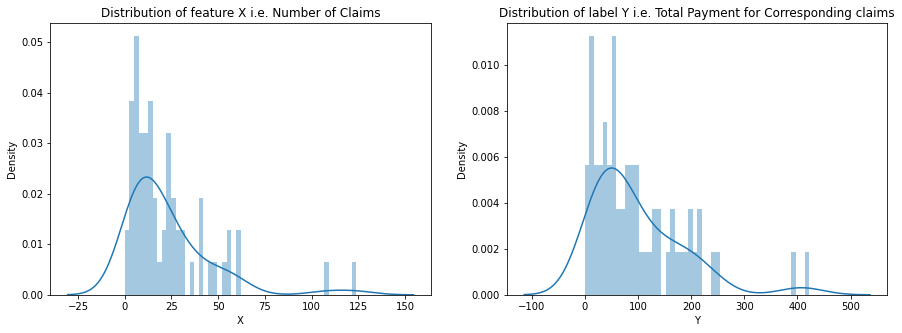

In [ ]:
# Visualization using seaborn and matplotlib¶
# Plotting the distribution of the feature and label from the Dataset.

# We can see that the distributions have approximately the same shape which indicates that there is a strong linear relationship between the feature and label.

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(df.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(df.Y,bins=50,ax=ax2)

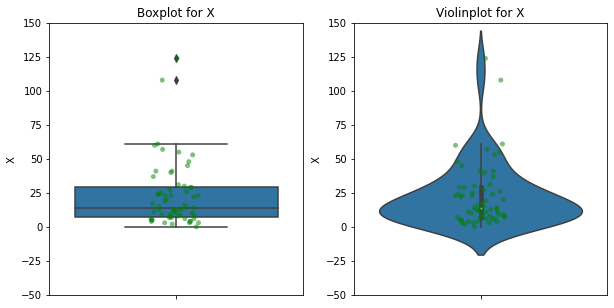

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=df,ax=ax1,)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax1,alpha=0.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=df,ax=ax2)
sns.stripplot(y='X',color='green',data=df,jitter=True,ax=ax2,alpha=0.5)

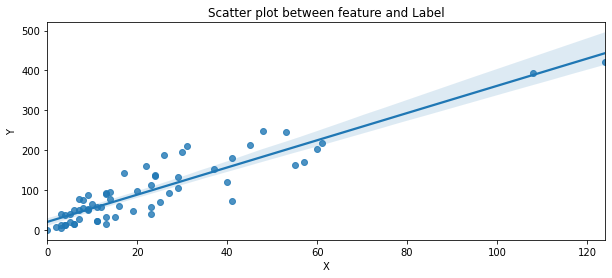

In [ ]:
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=df,x='X',y='Y',ax=ax1)

In [ ]:
def meanSquarredError(y_test,y_pred):
    error = 0
    for i,j in zip(y_test,y_pred):
        error += (i-j)**2
    error /= len(y_test)
    return error

def rootMeanSquarredError(y_test,y_pred):
    mean_error = meanSquarredError(y_test,y_pred)
    return np.sqrt(mean_error)    

In [ ]:
mse = meanSquarredError(Y,Y_pred)
print('MSE for Training set : %f' % (meanSquarredError(Y,Y_pred)))
print('RMSE for Training set : %f' % (rootMeanSquarredError(Y,Y_pred)))

MSE for Training set : 7742.463152
RMSE for Training set : 87.991267


In [ ]:
#Training Linear Regression Model¶
#Here we will train the Linear Regression model from scikit-learn and check the RMSE for the Training Data itself.


X = pd.DataFrame(df.X)
Y = df.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_pred,Y)
#print ('RMSE for Training set : %f' % (np.sqrt(mse))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#Checking mean RMSE after cross validation

# regr_cv = linear_model.LinearRegression()
# scores = cross_val_score(regr_cv,X,Y,cv=10,scoring='mean_squared_error')
# scores = scores*-1


In [ ]:
# np.mean(np.sqrt(scores))

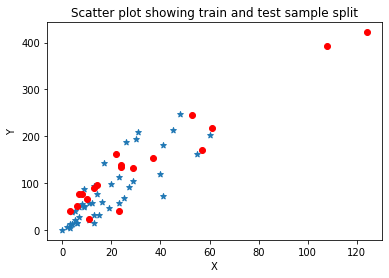

In [ ]:
#Splitting the dataset in Train and Test Sets.

#Below Scatter plot will show the distribution of training and testing samples..

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter plot showing train and test sample split')
ax.scatter(X_train,Y_train,marker='*',label='Train')
ax.scatter(X_test,Y_test,c='red',label='Test')

In [ ]:
regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train)
Y_pred = regr_fin.predict(X_test)
print('MSE for Testing set : %f' % (meanSquarredError(Y_pred,Y_test)))
print('RMSE for Testing set : %f' % (rootMeanSquarredError(Y_pred,Y_test)))

MSE for Testing set : 1304.781736
RMSE for Testing set : 36.121763


In [ ]:
#Train the model on the training set and predict the label values for the testing set.

#Looking at the RMSE for testing set.


regr_fin = linear_model.LinearRegression()
regr_fin.fit(X_train,Y_train)
Y_pred = regr_fin.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(Y_pred,Y_test))
#print 'RMSE for Testing set : %f' % (rmse)

In [ ]:
# x = range(0,X.max())
# y = x*regr.coef_

# fig, (ax,ax1) = plt.subplots(1,2,figsize=(12,6))
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_title('Plot for Regression line fit on Train and Test data')
# ax.scatter(X_train,Y_train,marker='*',label='Train')
# ax.scatter(X_test,Y_test,c='red',label='Test')
# ax.legend()
# ax.plot(x,y,c='black')

# ax1.set_title('Scatter plot between feature and Label')
# ax1.set_ylim(-100,500)
# sns.regplot(data=df,x='X',y='Y',ax=ax1)

In [ ]:
#Analysing the learing curve for the model
#I have written the below function to plot the learning curves for given model and step_size to increase number of samples it will be using 3 fold cross validation to calculate the cross validation error.

def plot_learning_curve(estimator, title, X, y, ylim=None, n_jobs=1,sample_steps = 5):
    df_train = X.join(y)
    plt.figure()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    J_train = []
    J_cv = []
    train_sizes = []
    sample_div = len(X) / sample_steps
    cvin = 0

    for i in range(1,sample_steps):
        
        num_samples = sample_div*i
        train_sizes.append(num_samples)
        
        df_temp = df_train.sample(num_samples,replace=False,random_state=42)
        estimator.fit(pd.DataFrame(df_temp.X),df_temp.Y)
        Y_pred = estimator.predict(pd.DataFrame(df_temp.X))  
        J_train.append(np.sqrt(metrics.mean_squared_error(Y_pred,df_temp.Y)))
        
        scores = cross_val_score(estimator,pd.DataFrame(df_temp.X),df_temp.Y,cv=3,scoring='mean_squared_error')
        J_cv.append(np.mean(np.sqrt(scores*-1)))

    train_scores_mean = np.mean(J_train)
    train_scores_std = np.std(J_train)
    test_scores_mean = np.mean(J_cv)
    test_scores_std = np.std(J_cv)

    plt.grid()

    plt.plot(train_sizes, J_train, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, J_cv, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

ValueError: ignored

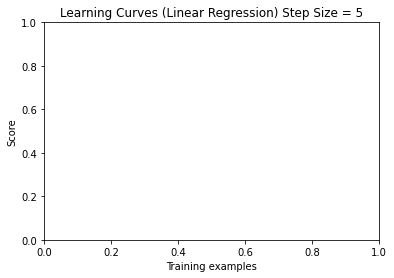

In [ ]:
estimator = linear_model.LinearRegression()

title = "Learning Curves (Linear Regression) Step Size = 5"
plot_learning_curve(estimator, title, X, Y, n_jobs=4,sample_steps = 5)

title = "Learning Curves (Linear Regression) Step Size = 12"
plot_learning_curve(estimator, title, X, Y, n_jobs=4,sample_steps = 12)